###  생선분류 서비스 구현 

- 주  제 : 생선별 특징(Feature)를 파악해서 생선을 분류
- 데이터 : 생선별 크기, 무게, 두께 대각선길이,....
- 타  겟 : 생선이름
- 진  행 
    * (1) 데이터에대한 분석 ==> 주요 특징만 추출
    * (2) 학습 방법 선택
        - 주  학습방법 : 지도학습
        - 세부학습방법 : 가장 쉽고 간단한 최근접이웃알고리즘(KNN)

In [1]:
import pandas as pd
import numpy as np

### [1] 데이터 준비 => 로딩 

In [2]:
# 상대경로 => . : 현재위치,   .. : 상위위치 즉 한단계 위
filename='../../data/fish.csv'

In [3]:
fishDF=pd.read_csv(filename)

### [2] 데이터 확인

In [4]:
# 전체 데이터 구조 ==> info()
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [5]:
# 컬럼별 데이터 확인 ==> 통계적 ==> describe()
fishDF.describe()

,Weight,Length,Diagonal,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,28.415723,31.227044,8.970994,4.417486
std,357.978317,10.716328,11.610246,4.286208,1.685804
min,0.000000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
# 결측치 확인 =>  isna()
fishDF.isna().sum()

Species     0
Weight      0
Length      0
Diagonal    0
Height      0
Width       0
dtype: int64

### [3] 길이와 무게로 2가지 종류의 생선 분류

In [7]:
# 현재 모든 생선 종류 확인
fishDF.Species.unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [8]:
# 도미(Bream)과 빙어(Smelt)의 무게랑 길이 데이터만 추출
bsMask=(fishDF['Species'] == 'Bream')  | (fishDF['Species'] == 'Smelt') 

In [9]:
bsDF=fishDF[bsMask][fishDF.columns[:3]]
bsDF.columns

Index(['Species', 'Weight', 'Length'], dtype='object')

In [10]:
# 시각화로 도미(Bream)과 빙어(Smelt) 분류 가능 여부 확인
import matplotlib.pyplot as plt

In [11]:
# Bream데이터만 출력
breamDF=bsDF[bsDF['Species'] == 'Bream']
smeltDF=bsDF[bsDF['Species'] == 'Smelt']

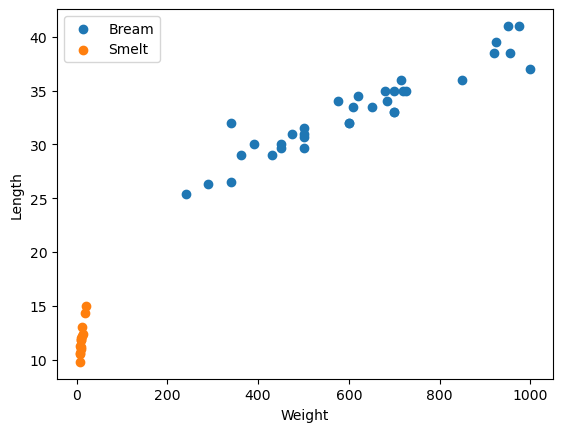

In [12]:
plt.scatter(breamDF.Weight, breamDF.Length, label='Bream')
plt.scatter(smeltDF.Weight, smeltDF.Length, label='Smelt')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend()
plt.show()

### [4] 데이터 가공 

- 학습 라이브러리에 형태로 가공

- [4-1] 특성/피쳐 데이터와  타겟 테이터 분리

In [13]:
# 특성/피쳐만 추출
bsData = bsDF[bsDF.columns[1:]]

# 타겟만 추출
bsTarget = bsDF.Species

In [14]:
# 차원 형태 확인 
print(bsData.shape, bsTarget.shape)

(49, 2) (49,)


### [5] 학습
- 메인학습방법 : 지도학습 - 분류(Classification)
- 세부학습방법 : 여러가지 알고리즘 중에서 가장 쉬운 최근접이웃알고리즘

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# 학습객체 생성 -> 기본값으로 생성
kncModel=KNeighborsClassifier()

In [17]:
# 학습 진행 =>  fit(학습특성데이터 2D, 학습타겟데이터 1D)
kncModel.fit(bsData, bsTarget)

KNeighborsClassifier()

In [18]:
# 학습 진행 후 설정된 속성값
kncModel.classes_

array(['Bream', 'Smelt'], dtype=object)

In [19]:
kncModel.n_samples_fit_

49

In [20]:
kncModel.n_features_in_

2

In [21]:
kncModel.feature_names_in_

array(['Weight', 'Length'], dtype=object)

### [6] 평가 
- 학습 후에 제대로 학습이 되었는지 확인하는 단계
- 비교 대상
    * 학  습 데이터에 대한 평가 => fit()메서드에 사용한 데이터
    * 테스트 데이터에 대한 평가 => fit()메서드에 사용하지 않은 데이터 
- 결과
    * 과대적합 <= 학습 데이터 평가 점수 > 테스트 데이터 평가 점수: 점수차가 크게 발생
    * 과소적합 <= 학습 데이터 평가 점수 & 테스트 데이터 평가 점수: 2개모두 점수 낮음
    * 최적적합 <== BEST 학습과 테스트 평가 점수가 90대 비슷비슷

In [22]:
# score(테스트특성데이터 2D, 테스트타겟데이터 1D)
# (1) 학습데이터 평가 진행
kncModel.score(bsData, bsTarget)

1.0

### [7] 예측

- 한 번도 사용되지 않은 새로운 데이터로 예측
- 모델의 성능이 거의 완성된 경우 사용
- 모델 완성 후  서비스(앱/웹)에서 예측에 활용되는 메서드 
- => predict(새로운 데이터 2D)
- => 예측에 대한 검증
    * 확률값 확인 =>  확률값 = predict_proba()
    * 시각화/이웃 데이터 확인 => 거리, 인덱스 = kneighbors() 

In [23]:
# 임의 데이터
#new_data=pd.DataFrame([[48, 27]], columns=[bsDF.columns[1:3]])
new_data=[48, 27]

In [24]:
# 예측
pre_target=kncModel.predict([new_data])
pre_target

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Smelt'], dtype=object)

In [25]:
# 예측에 대한 검증 ==> 최근접이웃  찾기 =>kneighbors() 메서드
# 거리값, 이웃 인덱스
distance_, k_index_ = kncModel.kneighbors([new_data])

D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [26]:
distance_, k_index_

(array([[30.55503232, 31.01902642, 37.55422746, 38.44008325, 38.73861123]]),
 array([[48, 47, 45, 46, 44]], dtype=int64))

In [27]:
k_index_.shape

(1, 5)

In [28]:
k_index_.reshape(-1)

array([48, 47, 45, 46, 44], dtype=int64)

In [29]:
# 시각화로 확인 하기 

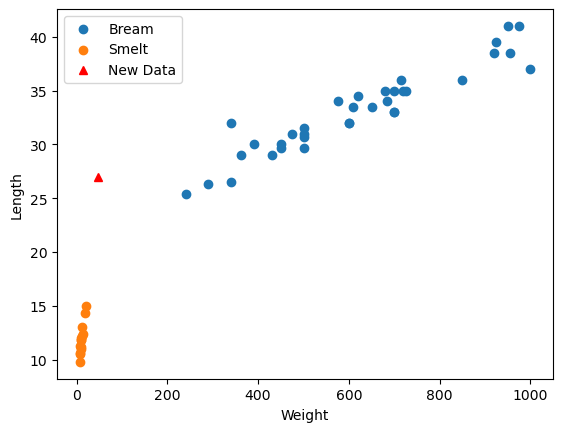

In [30]:
plt.scatter(breamDF.Weight, breamDF.Length, label='Bream')
plt.scatter(smeltDF.Weight, smeltDF.Length, label='Smelt')
plt.plot(new_data[0], new_data[1], '^r', label='New Data')
#plt.scatter, label='K-Neighbors')
plt.xlabel('Weight')
plt.ylabel('Length')
plt.legend()
plt.show()

- 예측에 대한 확률 ==> predict_proba()


In [31]:
result_proba=kncModel.predict_proba([new_data])
print(kncModel.classes_, result_proba, sep='\n')

['Bream' 'Smelt']
[[0. 1.]]


D:\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
